In [1]:
IRdisplay::display_html('<style>.container { width:100% !important; }</style>')

# GeoModels: un paquete para el análisis de datos geoestadísticos gaussianos y no-gaussianos

Scripts relacionados a lo expuesto en los slides. Este notebook contiene los procedimientos para:
1. Simulación y estimación de campos aleatorios (contenido de presentación).
2. Predicción.

![](latinr_logo.png)

`Moreno Bevilacqua`$^{*}$ moreno.bevilacqua@uv.cl

`Víctor Morales-Oñate`$^{**}$ vmorales.ppb@gmail.com

`Camilo Gómez-Narváez`$^{*}$ camilo.gomez@alumnos.uv.cl

$^{*}$ Instituto de Estadistica, Facultad de Ciencias, Universidad de Valparaíso, Chile.

$^{**}$ Instituto Superior de Investigación y Postgrados, Facultad de Ciencias Económicas, Universidad Central del Ecuador, Ecuador.

26 septiembre 2019
___________________________




> **Enlace página web del paquete (en desarrollo):** [#GeoModels](https://vmoprojs.github.io/GeoModels-page/)

_____________

In [48]:
require(GeoModels)
require(fields)

# 1. Simulación y estimación
## 1.1 Localizaciones Espaciales:

[1] 1156


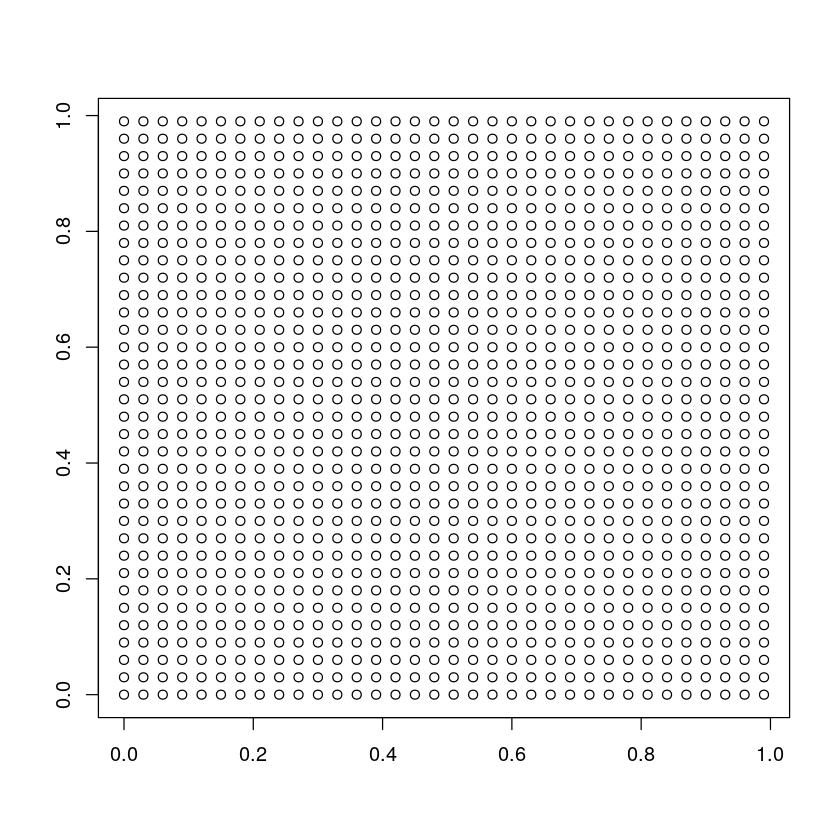

In [53]:
x = seq(0,1,0.03)
y = seq(0,1,0.03)

coords = expand.grid(x,y)
num_coords = length(x)^2
print(num_coords)
plot(coords,xlab = "",ylab = "")

## 1.2 Distribución

In [55]:
model    = "Tukeyh"
NuisParam(model,bivariate = FALSE,2)

[1] "mean"   "mean1"  "nugget" "sill"   "tail"

In [56]:
mean   = 3
mean1  = 2
nugget = 0
sill   = 1.5
tail   = 0.35

## 1.3 Modelo de Correlación

In [57]:
cmodel = "GenWend" 
CorrParam(cmodel)

[1] "power2" "scale"  "smooth"

In [58]:
power2 = 4
scale  = 0.2
smooth = 1

## 1.4 Todos los Parámetros del Modelo

In [59]:
param    = list(mean = mean,mean1 = mean1,nugget = nugget,sill = sill,
                tail = tail,power2 = power2,scale = scale,smooth = smooth);t(param)

mean,mean1,nugget,sill,tail,power2,scale,smooth
3,2,0,1.5,0.35,4,0.2,1


## 1.5 Matriz de Diseño

In [60]:
a0 = rep(1,num_coords)
a1 = runif(num_coords)
X  = cbind(a0,a1); head(X)

a0,a1
1,0.62916397
1,0.57995746
1,0.06689904
1,0.87266550
1,0.32127008
1,0.88867613


## 1.6 Simulación

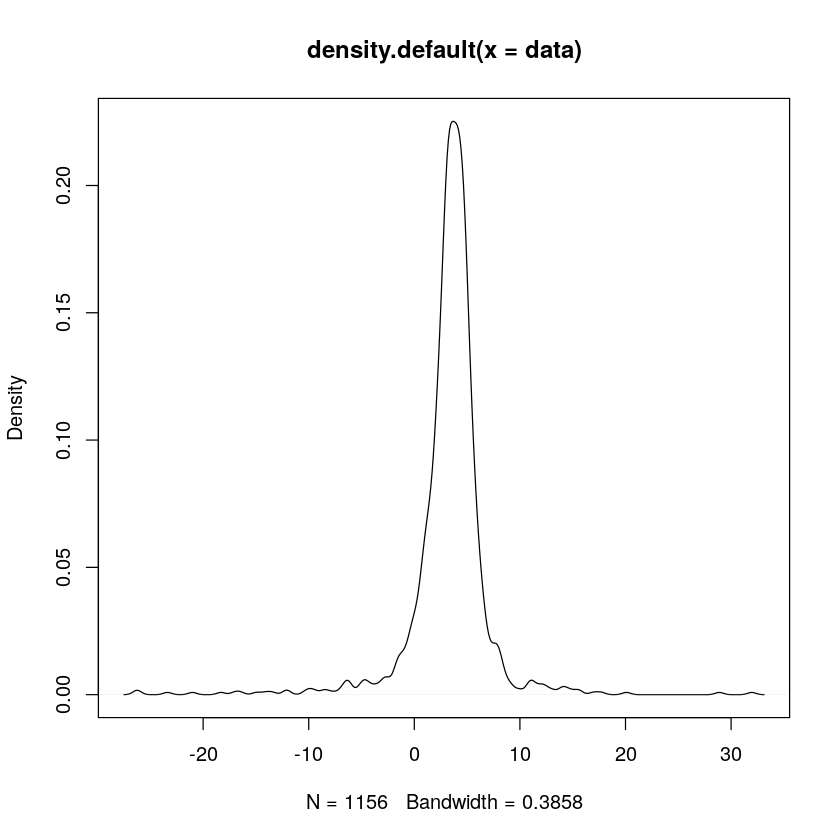

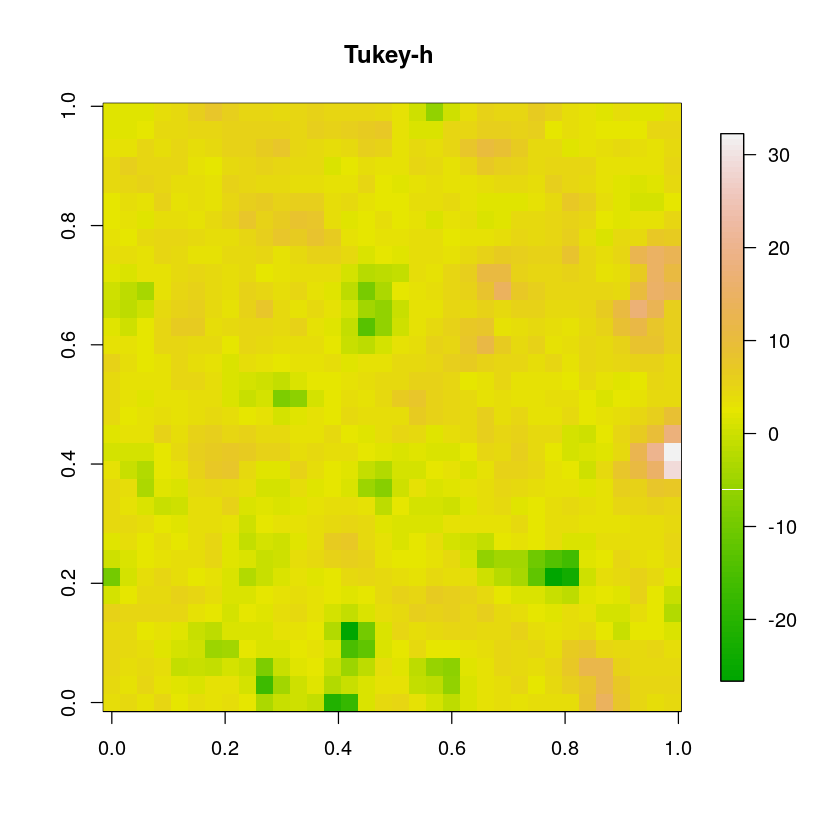

In [68]:
sim  = GeoSim(x,y,grid = TRUE,
              corrmodel = cmodel,model = model,param = param,
              X = X,
              sparse = TRUE)
data = sim$data

plot(density(data))
image.plot(x,y,data,col=terrain.colors(100),main="Tukey-h ",xlab="",ylab="")

## 1.7 Estimación de los Parámetros

In [62]:
start    = list(mean = mean,mean1 = mean1,scale = scale,sill = sill,tail = tail)
fixed    = list(nugget = nugget,power2 = power2,smooth = smooth)
maxdist  = 0.1

### 1.7.1 Verosimilitud completa

In [69]:
fit1 = GeoFit(data = data,x,y,grid = TRUE,corrmodel = cmodel,
              likelihood = "Full",type = "Standard",sparse = True,
              model = model,X = X,start = start,fixed = fixed)
fit1


##################################################################
Maximum Likelihood Fitting of Tukeyh Random Fields

Setting: Full Likelihood 

Model: Tukeyh 

Type of the likelihood objects: Standard 

Covariance model: GenWend 

Optimizer: Nelder-Mead 

Number of spatial coordinates: 1156 
Number of dependent temporal realisations: 1 
Type of the random field: univariate 
Number of estimated parameters: 5 

Type of convergence: Successful 
Maximum log-Likelihood value: -1476.19
AIC : 2962 
BIC : 2988 

Estimated parameters:
  mean   mean1   scale    sill    tail  
3.0125  2.0515  0.2182  1.9048  0.4606  

##################################################################

### 1.7.2 Verosimilitud ponderada compuesta a parejas

In [63]:
fit2 = GeoFit(data = data,x,y,grid = TRUE,corrmodel = cmodel,maxdist = maxdist,
              likelihood = "Marginal",type = "Pairwise",sparse = True,
              model = model,X = X,start = start,fixed = fixed)
fit2


##################################################################
Maximum Composite-Likelihood Fitting of Tukeyh Random Fields

Setting: Marginal Composite-Likelihood 

Model: Tukeyh 

Type of the likelihood objects: Pairwise 

Covariance model: GenWend 

Optimizer: Nelder-Mead 

Number of spatial coordinates: 1156 
Number of dependent temporal realisations: 1 
Type of the random field: univariate 
Number of estimated parameters: 5 

Type of convergence: Successful 
Maximum log-Composite-Likelihood value: -73883.99

Estimated parameters:
  mean   mean1   scale    sill    tail  
2.9115  1.9281  0.1968  1.6109  0.2638  

##################################################################

# 2. Predicción 
Para campos aleatorios Gamma
## 2.1 Simulación y estimación

In [51]:
x = seq(0,1,0.03)
y = seq(0,1,0.03)

coords = expand.grid(x,y)
num_coords = length(x)^2

model = "Gaussian"

mean   = 3
nugget = 0
sill   = 1

cmodel = "Exp" 
scale  = 0.2

param = list(mean = mean,nugget = nugget,sill = sill,
                scale = scale)


sim  = GeoSim(coordx = coords,
              corrmodel = cmodel,model = model,param = param,
              sparse = TRUE)
data = sim$data

start   = list(mean = mean,scale = scale,sill = sill)
fixed   = list(nugget = nugget)
maxdist = 0.01

fit = GeoFit(data = data,coordx = coords,corrmodel = cmodel,sparse = TRUE,
              model = model,start = start,fixed = fixed)
fit


##################################################################
Maximum Composite-Likelihood Fitting of Gaussian Random Fields

Setting: Marginal Composite-Likelihood 

Model: Gaussian 

Type of the likelihood objects: Pairwise 

Covariance model: Exp 

Optimizer: Nelder-Mead 

Number of spatial coordinates: 1156 
Number of dependent temporal realisations: 1 
Type of the random field: univariate 
Number of estimated parameters: 3 

Type of convergence: Successful 
Maximum log-Composite-Likelihood value: -1921236.01

Estimated parameters:
  mean   scale    sill  
2.9457  0.1501  1.0579  

##################################################################

### 2.2 Variograma

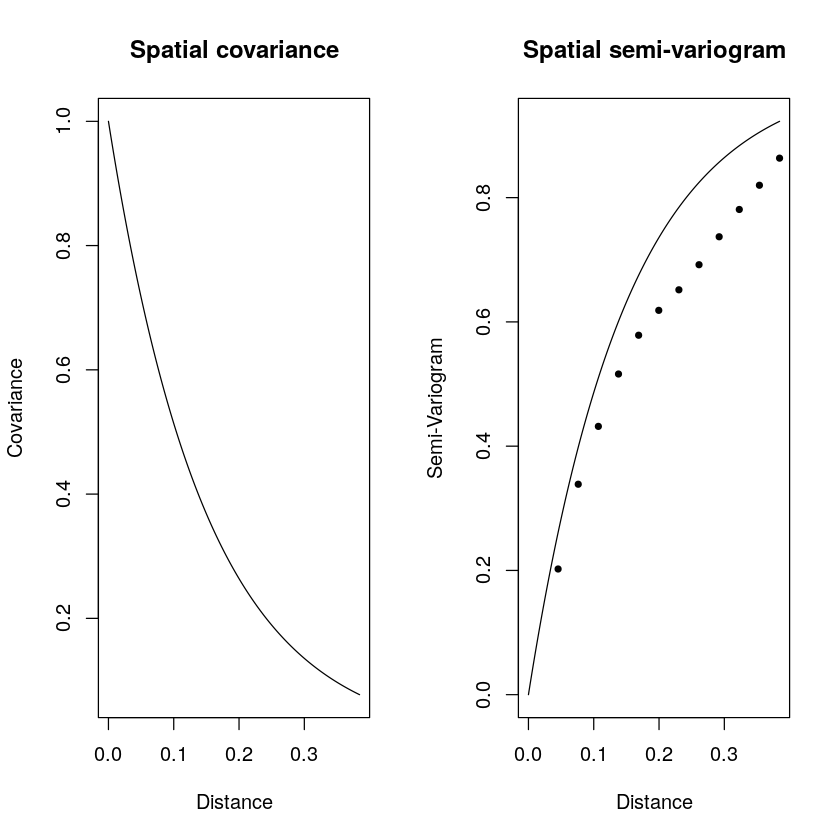

In [54]:
res = GeoResiduals(fit)

vario = GeoVariogram(data=res$data,coordx=coords,maxdist=0.4)

GeoCovariogram(res,show.cov=TRUE,show.vario=TRUE,vario=vario,pch=20)

### 2.3 Predicción (Kriging)

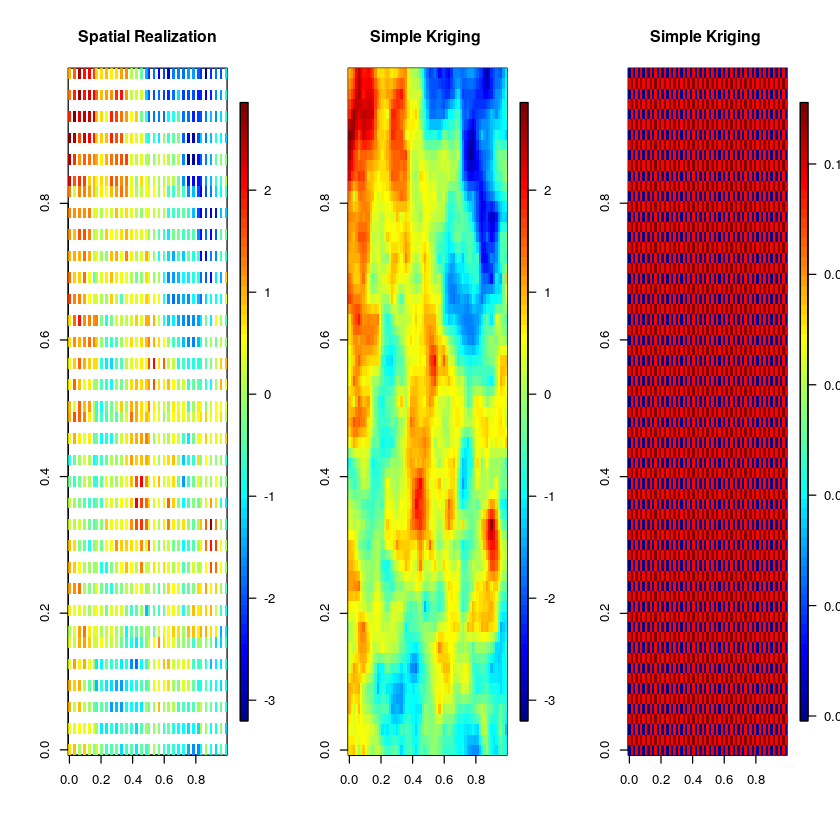

In [56]:
xx = seq(0,1,0.015)
loc_to_pred = as.matrix(expand.grid(xx,xx))


pr = GeoKrig(data=res$data,coordx=coords,loc=loc_to_pred,corrmodel=cmodel,model=model,mse=TRUE,
             sparse=TRUE,param= as.list(c(res$param,res$fixed)))


par(mfrow=c(1,3))
quilt.plot(coords,res$data,main="Spatial Realization")
map = matrix(pr$pred,ncol=length(xx))
mapmse = matrix(pr$mse,ncol=length(xx))


image.plot(xx, xx, map,    xlab="",ylab="",main="Simple Kriging ")
image.plot(xx, xx, mapmse, xlab="",ylab="",main="Simple Kriging ")